<a href="https://colab.research.google.com/github/armahdavi/AI_ML_assisted_breast_cancer_tumor_detection/blob/main/ML_BCTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# sklearn: scikit-learn
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bc_data = load_breast_cancer()
bc_df = pd.DataFrame(bc_data['data'], columns = bc_data['feature_names'])
bc_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
bc_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
bc_df['target'] = bc_data['target']
# bc_df.head(10)
bc_df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


In [ ]:
X = bc_df.drop('target', axis = 1)
y = bc_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

target
1    0.628571
0    0.371429
Name: proportion, dtype: float64
target
1    0.622807
0    0.377193
Name: proportion, dtype: float64


In [ ]:
lr = LogisticRegression(max_iter = 1000, random_state = 42)
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test) # This is the principle


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(accuracy_train)
print(accuracy_test)
print(len(y_train))
print(len(y_test))

0.9560439560439561
0.956140350877193
455
114


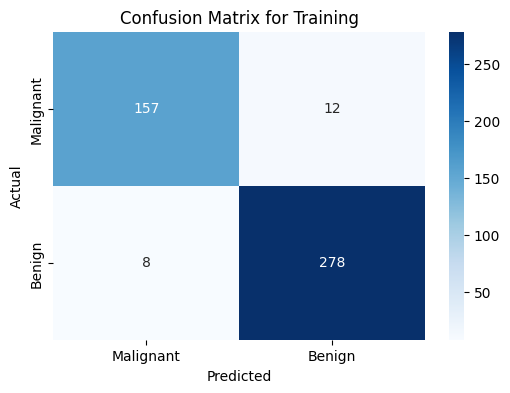

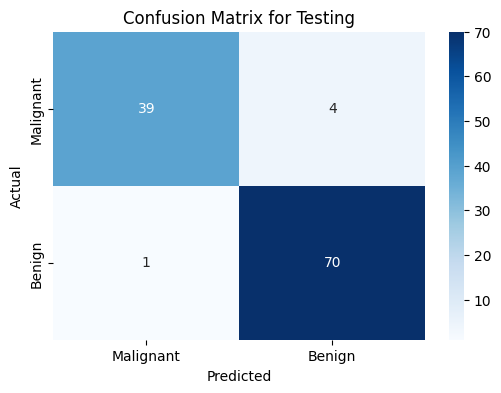

In [ ]:
# CONFUSION MATRIX

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for training
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training')
plt.show()



# Plot the confusion matrix for testing
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Testing')
plt.show()

In [ ]:
print('Recall scores are:')
print(recall_score(y_train, y_pred_train))
print(recall_score(y_test, y_pred_test))

print('Precision scores are:')
print(precision_score(y_train, y_pred_train))
print(precision_score(y_test, y_pred_test))

print('F1 scores are:')
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))

Recall scores are:
0.972027972027972
0.9859154929577465
Precision scores are:
0.9586206896551724
0.9459459459459459
F1 scores are:
0.9652777777777778
0.9655172413793104


In [ ]:
# OTHER FAMOUS ML MODELS
## SVM/SVC
## Decision Trees
## Random Forest
## XGBoost
## Naive Bayes
## Neural Networks

In [ ]:
# RF
rf = RandomForestClassifier(n_estimators = 100,
                            max_depth = 10,
                            min_samples_split = 5,
                            min_samples_leaf = 2,
                            max_features = 'sqrt',
                            random_state = 42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test) # This is the principle

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(accuracy_train)
print(accuracy_test)
print(len(y_train))
print(len(y_test))

0.9934065934065934
0.9649122807017544
455
114


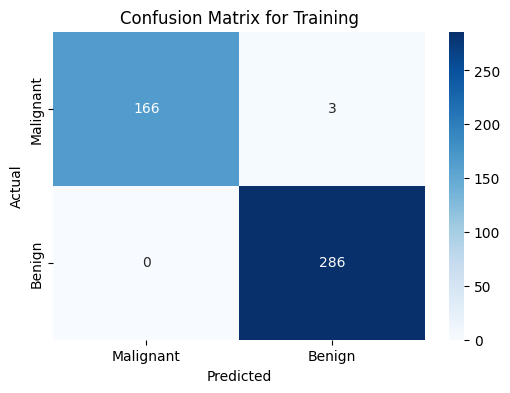

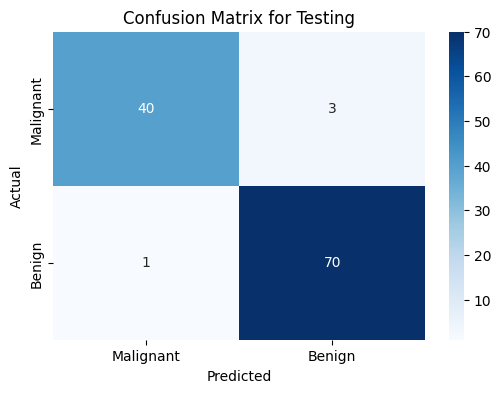

In [ ]:
# CONFUSION MATRIX

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for training
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training')
plt.show()



# Plot the confusion matrix for testing
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Testing')
plt.show()

In [ ]:
print('Recall scores are:')
print(recall_score(y_train, y_pred_train))
print(recall_score(y_test, y_pred_test))

print('Precision scores are:')
print(precision_score(y_train, y_pred_train))
print(precision_score(y_test, y_pred_test))

print('F1 scores are:')
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))

Recall scores are:
1.0
0.9859154929577465
Precision scores are:
0.9896193771626297
0.958904109589041
F1 scores are:
0.9947826086956522
0.9722222222222222


In [ ]:
# XGBOOST Classifier
xgb = XGBClassifier(
    n_estimators=200,         # Number of trees
    max_depth=6,              # Maximum depth of each tree
    learning_rate=0.1,        # Step size shrinkage
    subsample=0.8,            # Fraction of samples used per tree
    colsample_bytree=0.8,     # Fraction of features used per tree
    min_child_weight=1,       # Minimum sum of instance weight needed in a child
    gamma=0,                  # Minimum loss reduction required for split
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)


xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test) # This is the principle

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(accuracy_train)
print(accuracy_test)
print(len(y_train))
print(len(y_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:24:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


1.0
0.9649122807017544
455
114


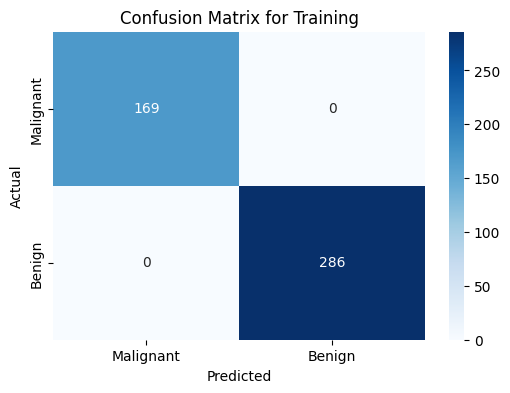

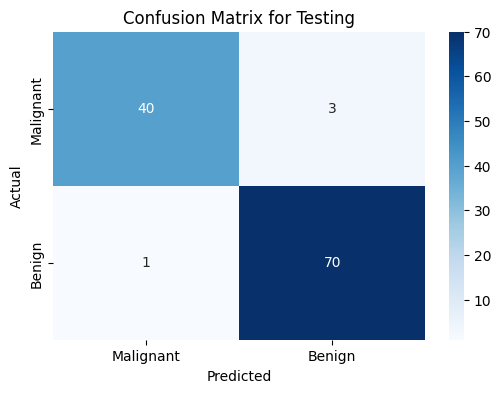

In [ ]:
# CONFUSION MATRIX

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for training
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training')
plt.show()



# Plot the confusion matrix for testing
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Testing')
plt.show()

In [ ]:
print('Recall scores are:')
print(recall_score(y_train, y_pred_train))
print(recall_score(y_test, y_pred_test))

print('Precision scores are:')
print(precision_score(y_train, y_pred_train))
print(precision_score(y_test, y_pred_test))

print('F1 scores are:')
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))

Recall scores are:
1.0
0.9859154929577465
Precision scores are:
1.0
0.958904109589041
F1 scores are:
1.0
0.9722222222222222
